In [28]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muril\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from goose3 import Goose

g=Goose()
url='https://en.wikipedia.org/wiki/Natural_language_processing'
article=g.extract(url)

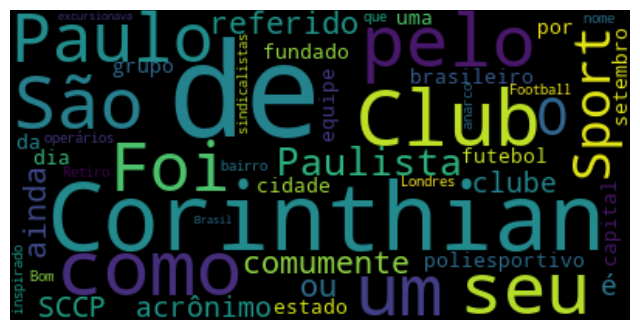

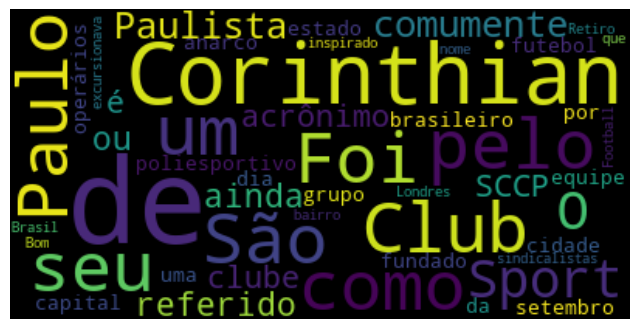

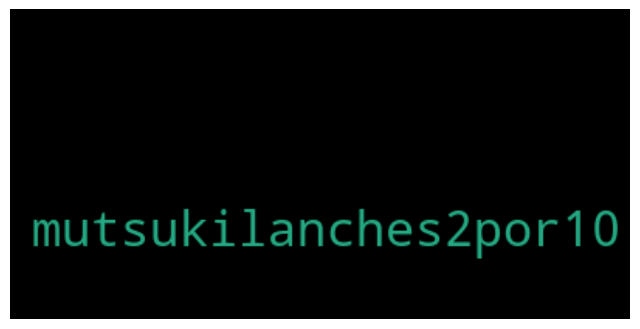

In [4]:
import tkinter as tk
from tkinter import messagebox
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from goose3 import Goose
import spacy
#import en_core_web_sm

# Carrega o modelo spaCy
nlp = spacy.load('en_core_web_sm')

def seguir_texto():
    # Pega o texto da área de entrada de texto
    texto = entrada_texto.get("1.0", tk.END).strip()
    if texto:
        gerar_nuvem_de_palavras(texto)
    else:
        messagebox.showwarning("Atenção", "Digite algum texto para gerar a nuvem de palavras.")

def seguir_link():
    url = entrada_link.get().strip()
    if url:
        try:
            g = Goose()
            article = g.extract(url)
            article_text = article.cleaned_text
            if article_text:
                # Processa o texto com spaCy
                document = nlp(article_text)
                
                # Exibe um resumo simples do artigo (exemplo com as primeiras frases)
                resumo = ' '.join([sent.text for sent in document.sents][:3])  # 3 primeiras sentenças
                messagebox.showinfo("Resumo do Artigo", resumo)
            else:
                messagebox.showwarning("Erro", "Não foi possível extrair o conteúdo do link.")
        except Exception as e:
            messagebox.showerror("Erro", f"Ocorreu um erro ao acessar o link: {e}")
    else:
        messagebox.showwarning("Atenção", "Digite um link válido.")

def sair():
    root.destroy()

def selecionar_idioma(idioma):
    idioma_label.config(text=f"Idioma selecionado: {idioma}")

def gerar_nuvem_de_palavras(texto):
    # Gera a nuvem de palavras
    cloud = WordCloud().generate(texto)
    
    # Cria a figura no matplotlib
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cloud, interpolation='bilinear')
    ax.axis('off')
    
    # Exibe a nuvem de palavras no Tkinter
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(pady=20)

# Criar a janela principal
root = tk.Tk()
root.title("Interface Tkinter")
root.geometry("800x800")

# Linha 1: Botões para seleção de idioma e label do idioma selecionado
linha1 = tk.Frame(root)
linha1.pack(pady=10, padx=10, fill=tk.X)

btn_ingles = tk.Button(linha1, text="Inglês", command=lambda: selecionar_idioma("Inglês"))
btn_ingles.pack(side=tk.LEFT, padx=10, fill=tk.X, expand=True)

btn_portugues = tk.Button(linha1, text="Português", command=lambda: selecionar_idioma("Português"))
btn_portugues.pack(side=tk.LEFT, padx=10, fill=tk.X, expand=True)

idioma_label = tk.Label(linha1, text="Idioma selecionado: Nenhum")
idioma_label.pack(side=tk.LEFT, padx=10, fill=tk.X, expand=True)

# Linha 2: Label e área de entrada de texto e botão "Seguir"
linha2 = tk.Frame(root)
linha2.pack(pady=10, padx=10, fill=tk.X)

label_texto = tk.Label(linha2, text="Texto:")
label_texto.pack(side=tk.LEFT, padx=10)

entrada_texto = tk.Text(linha2, height=4, width=40)
entrada_texto.pack(side=tk.LEFT, padx=10, fill=tk.X, expand=True)

btn_seguir_texto = tk.Button(linha2, text="Seguir", command=seguir_texto)
btn_seguir_texto.pack(side=tk.RIGHT, padx=10)

# Linha 3: Label, entrada de link e botão "Seguir"
linha3 = tk.Frame(root)
linha3.pack(pady=10, padx=10, fill=tk.X)

label_link = tk.Label(linha3, text="Link:")
label_link.pack(side=tk.LEFT, padx=10)

entrada_link = tk.Entry(linha3, width=40)
entrada_link.pack(side=tk.LEFT, padx=10, fill=tk.X, expand=True)

btn_seguir_link = tk.Button(linha3, text="Seguir", command=seguir_link)
btn_seguir_link.pack(side=tk.RIGHT, padx=10)

# Linha 4: Botões adicionais e botão "Sair"
linha4 = tk.Frame(root)
linha4.pack(pady=10, padx=10, fill=tk.X)

btn_sair = tk.Button(linha4, text="Sair", command=sair)
btn_sair.pack(side=tk.RIGHT, padx=10)

# Executar o loop principal da interface
root.mainloop()